In [1]:
# Some styling for the jupyter notebook

from IPython.display import display, HTML
s = """

<style>

.rendered_html {
    font-family: "Roboto", helvetica;
    font-size: 150%;
    line-height: 1.3;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: white;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}

.rendered_html h2 {
    margin: 1.1em 0em 0.5em;
    color: white;
    line-height: 1.2;
}

.rendered_html h3 {
    margin: 1.1em 0em 0.5em;
    color: white;
    line-height: 1.2;
}

.rendered_html li {
    color: white;
}

.prompt {
    font-size: 120%; 
}

.CodeMirror-lines {
    font-size: 120%; 
}

.output_area {
    font-size: 120%; 
}

#notebook {
    background-image: url('http://www.hdwallpapersnew.net/wp-content/uploads/2015/10/lights-bokeh-widescreen-high-definition-wallpaper-for-desktop-background-photos-free.jpg')
}
h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h3.point {
    font-size: 200%;
    text-align: center;
    margin: 2em 0em 2em 0em;
    #26465D
}


a.anchor-link {
    display: none;
}

h1.title { 
    font-size: 250%;
}


#container {
  height: 720px;
  width: 1080px;
  position: relative;
}

#image {
  position: absolute;
  left: 0;
  top: 0;
  opacity: 0.6;
  
}

#text {
  margin: 0.25em 0em 0.5em;
  text-align: center;
  line-height: 1.2; 
  page-break-before: always;
  z-index: 100;
  position: absolute;
  color: white;
  font-size: 1em;
  font-weight: bold;
  left: 150px;
  top: 250px;
}

</style>

"""

display(HTML(s))

In [2]:
# Some packages, libraries and tweaking
import warnings
warnings.filterwarnings('ignore')
from bokeh.models.mappers import LinearColorMapper
import numpy as np
from bokeh.plotting import figure, show, output_notebook
import matplotlib.pylab as plt
%matplotlib inline

# Why the qTalks?


<center><div id="container"><img id="image" src="files/night.jpg"><p id="text">
    Leverage
  </p></div></center>




<center><div id="container"><img id="image" src="files/lac.jpg"><p id="text">
    Knowledge transmission
  </p></div></center>


<center><div id="container"><img id="image" src="files/garden.jpg"><p id="text">
    Sharing enthusiasm
  </p></div></center>


## Python data visualization tools 

* Matplotlib

* Ggplot

* Bokeh

## How to use Ggplot?

In [3]:
from ggplot import *


## Some examples

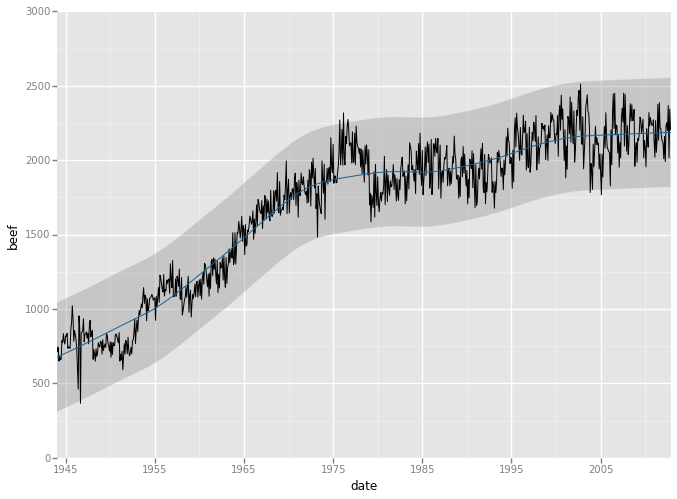

<ggplot: (8742759120325)>

In [4]:
beef_plot = ggplot(aes(x='date', y='beef'), data=meat) +\
            geom_line() +\
            stat_smooth(colour='#196496', span=0.3)
beef_plot

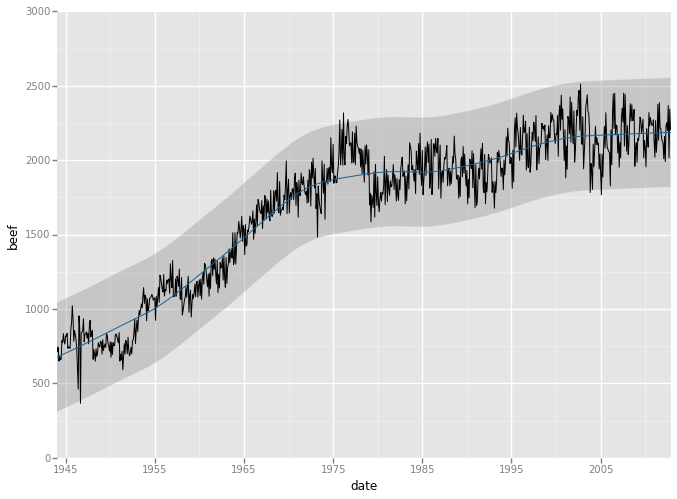

<ggplot: (8742786395428)>

In [5]:
# Different themes

beef_plot + theme_gray()

In [21]:
diamond_plot = ggplot(diamonds, aes(x='carat', y='price', 
                                    fill='cut')) +\
        geom_point(position = 'jitter')+\
        scale_color_gradient(low = 'red', high = 'blue') +\
        stat_smooth(colour='black', span=0.4) + \
        xlab("Carats") + xlim(low=0, high=5.0) + \
        ylim(low=0, high=25000) +\
        scale_x_continuous(breaks=(0,3.0,5.0)) + \
        ylab("Price") +\
        scale_y_continuous(breaks=(0,10000,20000)) + \
        ggtitle("Awesome diamonds") +\
        theme_bw() + \
        facet_wrap('cut')

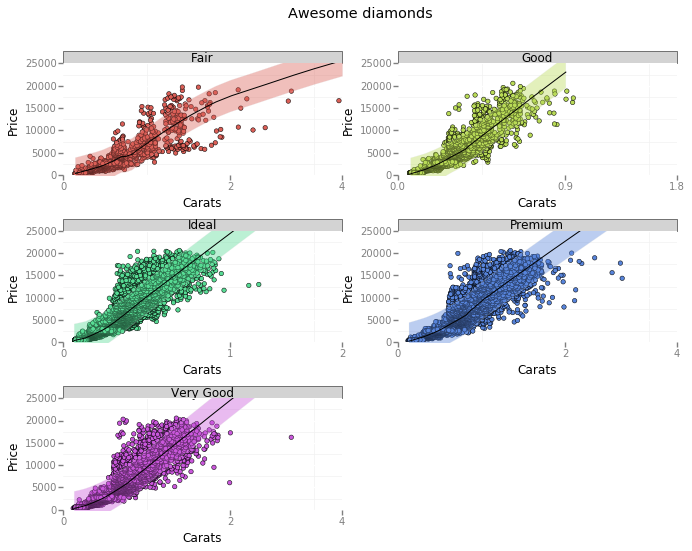

<ggplot: (8742752136319)>

In [22]:
diamond_plot

In [8]:
another_diamond_plot = ggplot(diamonds, aes(x='carat', y='price', fill='color')) +\
        geom_point(position = 'jitter')+\
        scale_color_gradient(low='#05D9F6', high='#5011D1') +\
        stat_smooth(colour='black', span=0.4) + \
        xlab("Carats") + xlim(low=0, high=5.0) + \
        ylim(low=0, high=25000) +\
        scale_x_continuous(breaks=(0,3.0,5.0)) + \
        ylab("Price") +\
        scale_y_continuous(breaks=(0,10000,20000)) + \
        ggtitle("Diamonds") +\
        theme_gray() + \
        facet_wrap('cut', 'color')

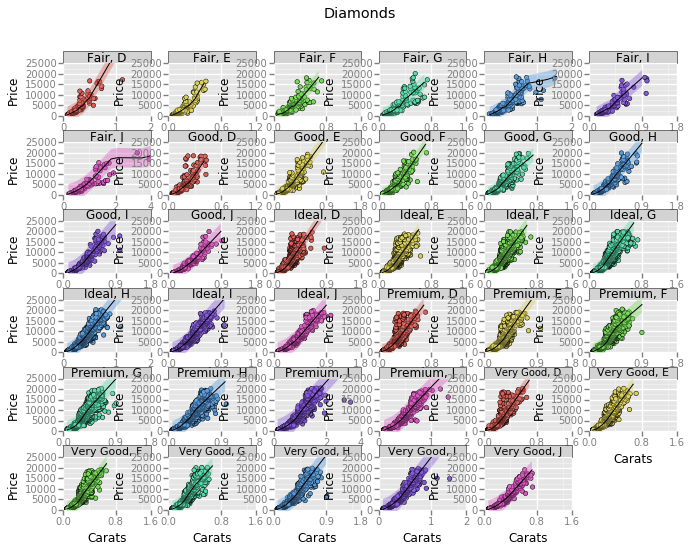

<ggplot: (8742760190605)>

In [9]:
another_diamond_plot

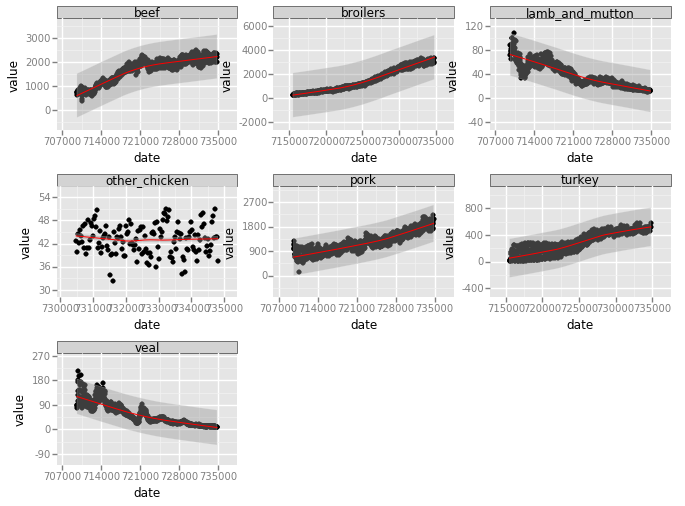

<ggplot: (8742758309359)>

In [10]:
import pandas as pd

meat_lng = pd.melt(meat, id_vars=['date'])

p = ggplot(aes(x='date', y='value'), data=meat_lng)
p + geom_point() + \
    stat_smooth(colour="red") + \
    facet_wrap("variable")





# Bokeh example

In [16]:
# Color map for the PCA projections

# The color generation is done following this blog post: http://bsou.io/posts/color-gradients-with-python

def hex_to_RGB(hex):
    ''' "#FFFFFF" -> [255,255,255] '''
    # Pass 16 to the integer function for change of base
    return [int(hex[i:i+2], 16) for i in range(1,6,2)]

def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])

def color_dict(gradient):
    ''' Takes in a list of RGB sub-lists and returns dictionary of
    colors in RGB and hex form for use in a graphing function
    defined later on '''
    return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
          "r":[RGB[0] for RGB in gradient],
          "g":[RGB[1] for RGB in gradient],
          "b":[RGB[2] for RGB in gradient]}

def linear_gradient(start_hex, finish_hex="#FFFFFF", n=10):
    '''
    returns a gradient list of (n) colors between
    two hex colors. start_hex and finish_hex
    should be the full six-digit color string,
    inlcuding the number sign ("#FFFFFF") 
    '''
    # Starting and ending colors in RGB form
    s = hex_to_RGB(start_hex)
    f = hex_to_RGB(finish_hex)
    # Initilize a list of the output colors with the starting color
    RGB_list = [s]
      # Calcuate a color at each evenly spaced value of t from 1 to n
    for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
        curr_vector = [
          int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
          for j in range(3)
        ]
    # Add it to our list of output colors
        RGB_list.append(curr_vector)

    return color_dict(RGB_list)



def color_map(color_palette):
    # Create a mapping from values to colors
    my_color_mapper = LinearColorMapper(palette=color_palette, 
                                        low=-1, high=1)
    x = np.linspace(0, 1, 100)
    y = np.linspace(-1, 1, 100)
    xx, yy = np.meshgrid(x, y)
    my_image = xx ** yy
    p = figure(x_range=[0, 1], y_range=[0, 1])
    p.image(image=[my_image], x=[0], 
            y=[0], dw=[1], dh=[1], color_mapper=my_color_mapper)
    return p








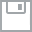
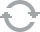
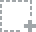
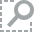
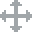
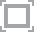
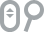
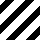
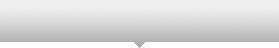
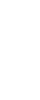
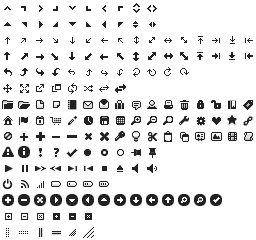
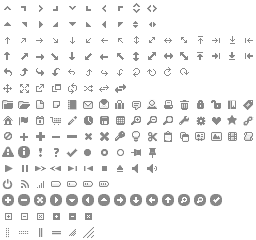
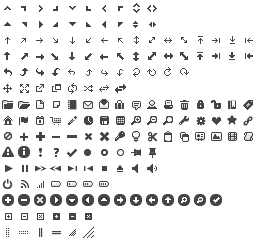
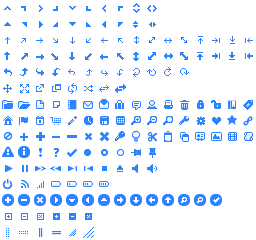
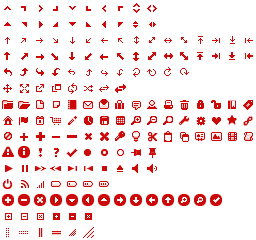
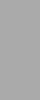
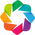
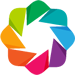

In [17]:
output_notebook()
my_linear_color_palette = linear_gradient("#0000FF", "#FF0000", 100)['hex']
another_linear_color_palette = linear_gradient("#FF9933", "#FF66CC", 100)['hex']
show(color_map(my_linear_color_palette))

# Next Time

### D3.js and how to make interactive graphics with JavaScript


## Some references

* Some jupyter themes: https://github.com/dunovank/jupyter-themes
* A grammar of graphics article http://vita.had.co.nz/papers/layered-grammar.pdf
* Ggplot Wikipedia page: https://en.wikipedia.org/wiki/Ggplot2
* Ggplot documentation for Python: http://ggplot.yhathq.com/docs/index.html
* yhat blog post about Ggplot for Python: http://blog.yhathq.com/posts/ggplot-for-python.html
* Bokeh documentation: http://bokeh.pydata.org/en/0.10.0/docs/reference.html
* Bokeh gallery: http://bokeh.pydata.org/en/0.10.0/docs/gallery.html
* A great blog about IPython and Jupyter: http://www.damian.oquanta.info/